# Notes

Dataset: https://archive.ics.uci.edu/ml/datasets/mammographic+mass

![image.png](attachment:image.png)

# Imports and settings

In [195]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import os
import warnings
warnings.filterwarnings('ignore')

idx=pd.IndexSlice

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 80%; }
    div#maintoolbar-container { width: 60%; }
</style>
"""))

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [ ]:
main_path=os.getcwd()
main_path

In [ ]:
data_path=os.path.join(main_path,"data")
data_path

# Data Loading

![image.png](attachment:image.png)

In [6]:
columns_names=["BI-RADS","Age","Shape","Margin","Density","Severity"]

In [7]:
df=pd.read_csv(os.path.join(data_path,"mammographic_masses_data.csv"),
               header=None,  #tell Pandas that the csv does not have headers
              names=columns_names)

df

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [8]:
print("dataset rows: {}".format(df.shape[0]))

dataset rows: 961


# Data Cleaning

## Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BI-RADS   961 non-null    object
 1   Age       961 non-null    object
 2   Shape     961 non-null    object
 3   Margin    961 non-null    object
 4   Density   961 non-null    object
 5   Severity  961 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.2+ KB


formally there are no nan however we know that there are missing values from the data provider. We have to uderstand how missing value shave been represented in the dataset (it can be ?, or something else), and first replace them with nan, and later decide how to treat these missing values

In [10]:
df.isna().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [11]:
for col in df.iteritems(): #loop on the columns of the data frame
    print("unique values for column {}".format(col[0]))
    print(col[1].unique(),"\n")

unique values for column BI-RADS
['5' '4' '3' '?' '2' '55' '0' '6'] 

unique values for column Age
['67' '43' '58' '28' '74' '65' '70' '42' '57' '60' '76' '64' '36' '54'
 '52' '59' '40' '66' '56' '75' '63' '45' '55' '46' '39' '81' '77' '48'
 '78' '50' '61' '62' '44' '23' '80' '53' '49' '51' '25' '72' '73' '68'
 '33' '47' '29' '34' '71' '84' '24' '86' '41' '87' '21' '19' '35' '37'
 '79' '85' '69' '38' '32' '27' '83' '88' '26' '31' '?' '18' '82' '93' '30'
 '22' '96' '20'] 

unique values for column Shape
['3' '1' '4' '?' '2'] 

unique values for column Margin
['5' '1' '?' '4' '3' '2'] 

unique values for column Density
['3' '?' '1' '2' '4'] 

unique values for column Severity
[1 0] 



## Data Correction

remove values out of range, change the data types, replace ? with nan

**BI-RADS** (range 1-5):
1. replace ? with nan
2. replace 55 with 5
3. delete 0 and 6
4. transform it inot a numeric datatype

In [12]:
df["BI-RADS"].value_counts()

4     547
5     345
3      36
2      14
6      11
0       5
?       2
55      1
Name: BI-RADS, dtype: int64

In [13]:
df["BI-RADS"]=df["BI-RADS"].replace("?", np.nan)
df["BI-RADS"]=df["BI-RADS"].replace("55", "5")
df["BI-RADS"]=df["BI-RADS"].astype(float)

In [14]:
df=df.query("`BI-RADS` >0 and `BI-RADS`<=5")
# df.loc[(df["BI-RADS"]>=1) & (df["BI-RADS"]<=5)] #same syntax as above

In [15]:
df["BI-RADS"].value_counts()

4.0    547
5.0    346
3.0     36
2.0     14
Name: BI-RADS, dtype: int64

In [16]:
print("dataset rows: {}".format(df.shape[0]))

dataset rows: 943


**Age** (integer):
1. replace ? with nan
2. transform it into numeric datatype

In [17]:
df["Age"]=df["Age"].replace("?",np.nan)
df["Age"]=df["Age"].astype(float)

In [18]:
df["Age"].value_counts()

59.0    36
67.0    32
57.0    32
66.0    30
46.0    28
64.0    27
55.0    26
65.0    25
54.0    25
62.0    25
53.0    24
60.0    24
56.0    23
63.0    23
49.0    23
58.0    22
50.0    21
45.0    20
43.0    20
71.0    20
42.0    19
52.0    19
68.0    19
44.0    18
40.0    18
76.0    16
72.0    15
51.0    15
41.0    14
35.0    13
47.0    13
70.0    13
61.0    13
74.0    12
36.0    11
39.0    11
48.0    11
69.0    11
80.0    10
73.0     9
77.0     9
33.0     9
34.0     9
38.0     9
37.0     8
79.0     8
23.0     7
75.0     7
31.0     7
21.0     6
32.0     6
27.0     6
28.0     5
83.0     5
86.0     5
87.0     5
85.0     4
78.0     4
24.0     4
19.0     4
30.0     3
25.0     3
22.0     3
29.0     3
84.0     3
26.0     2
81.0     2
18.0     1
88.0     1
82.0     1
93.0     1
96.0     1
20.0     1
Name: Age, dtype: int64

**Shape** (range 1-4):
1. replace ? with nan
3. transform into numeric datatype

In [19]:
df["Shape"]=df["Shape"].replace("?",np.nan)
df["Shape"]=df["Shape"].astype(float)

**Margin** (range 1-5):
1. replace ? with nan
3. transform into numeric datatype

In [20]:
df["Margin"]=df["Margin"].replace("?",np.nan)
df["Margin"]=df["Margin"].astype(float)

In [21]:
df["Margin"].value_counts()

1.0    355
4.0    274
5.0    133
3.0    111
2.0     24
Name: Margin, dtype: int64

**Density** (range 1-4):
1. replace ? with nan
3. transform into numeric datatype

In [22]:
df["Density"]=df["Density"].replace("?",np.nan)
df["Density"]=df["Density"].astype(float)

In [23]:
df["Density"].value_counts()

3.0    783
2.0     58
1.0     15
4.0     11
Name: Density, dtype: int64

## Data Filtering

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   943 non-null    float64
 1   Age       938 non-null    float64
 2   Shape     914 non-null    float64
 3   Margin    897 non-null    float64
 4   Density   867 non-null    float64
 5   Severity  943 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 51.6 KB


In [25]:
df.isna().sum()

BI-RADS      0
Age          5
Shape       29
Margin      46
Density     76
Severity     0
dtype: int64

count missing values for each individual

In [26]:
df.isna().sum(axis=1).sort_values(ascending=False).value_counts()

0    816
1     98
2     29
dtype: int64

815 people miss 0 values, 98 miss 1 value, 29 miss 2 values

It is preferred to make least assumptions as possible. Moreover, as the dataset has only 5 predictive variables, it is fair to discard inviduals with 2 out of 5 missing values.

In [27]:
df=df.loc[df.isna().sum(axis=1).lt(2)]

In [28]:
print("dataset rows: {}".format(df.shape[0]))

dataset rows: 914


## Missing data

In [29]:
missing_data=df.isna().mean(axis=0).to_frame().rename(columns={0:"percentage missing data"}).round(4)*100
missing_data=missing_data.sort_values(by="percentage missing data", ascending=False)
missing_data

,percentage missing data
Density,6.13
Margin,2.30
Shape,1.75
Age,0.55
BI-RADS,0.00
Severity,0.00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   914 non-null    float64
 1   Age       909 non-null    float64
 2   Shape     898 non-null    float64
 3   Margin    893 non-null    float64
 4   Density   858 non-null    float64
 5   Severity  914 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 50.0 KB


**Age** replace missing values with median age (as the distribution of age is negatively skewed)

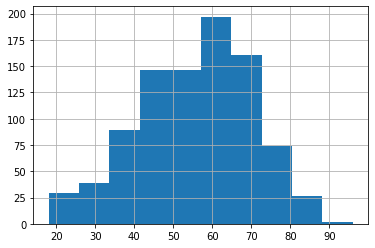

In [31]:
df["Age"].hist()

In [32]:
df["Age"]=df["Age"].fillna(df["Age"].median())

**Shape** missing values can be replaced with 0 as it is a categorical nominal variables that have to be encoded into d4 dummy varialbes. Individuals without shape will be the baseline case (4 zeros in the d dummy variable columns).

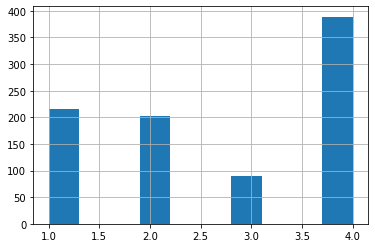

In [33]:
df["Shape"].hist()

In [34]:
df["Shape"]=df["Shape"].fillna(0)

**Margin** is a categorical nominal variables (same as for Shape)

In [35]:
df["Margin"]=df["Margin"].fillna(0)

**Density** it is categorical ordinal, therefore it has to be replaced with a value or discarded<br>
Density is positively correlated with Severity, even though it is the least correlated one. The vast majority (90%) of individuals have density=3.<br>
It is a good idea ot input 4 for missing values in order to safeguard against false negative.

In [36]:
df.corr().round(2)["Density"]

BI-RADS     0.12
Age         0.04
Shape       0.11
Margin      0.10
Density     1.00
Severity    0.08
Name: Density, dtype: float64

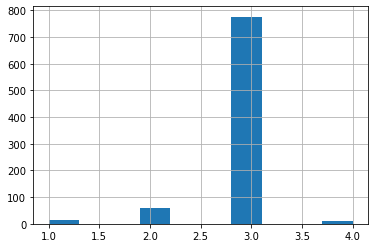

In [37]:
df["Density"].hist()

In [38]:
df["Density"].isna().sum() #number of missing values

56

In [39]:
df["Density"]=df["Density"].fillna(df["Density"].max())

No missing values left

In [40]:
df.isna().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

# Feature Engineering

Transform categorical into numerical variables

1. categorical variables
    1. ordinal -> score
    2. nominal -> dummies

![image.png](attachment:image.png)

## Categorical Nominal (one-hot-encoding)

In [41]:
from sklearn.preprocessing import OneHotEncoder #this is the one used to tranform categorical nominal variables into dummies
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(drop="first"), #I want to apply this method 
     ["Shape","Margin"]),        #to this columns
    remainder='passthrough')      #don't touch the other columns

df_original=df.copy()
df = transformer.fit_transform(df) #here we apply to df the method we have defined above
df #this is a numpy array of numbers, not a Pandas datafame (it doesn't have index and columns names)

df = pd.DataFrame(df, columns=transformer.get_feature_names()).astype(int) #transform the numpy array of number into a Pandas dataframe with columns names and index
df

,onehotencoder__x0_1.0,onehotencoder__x0_2.0,onehotencoder__x0_3.0,onehotencoder__x0_4.0,onehotencoder__x1_1.0,onehotencoder__x1_2.0,onehotencoder__x1_3.0,onehotencoder__x1_4.0,onehotencoder__x1_5.0,BI-RADS,Age,Density,Severity
0,0,0,1,0,0,0,0,0,1,5,67,3,1
1,1,0,0,0,1,0,0,0,0,4,43,4,1
2,0,0,0,1,0,0,0,0,1,5,58,3,1
3,1,0,0,0,1,0,0,0,0,4,28,3,0
4,1,0,0,0,0,0,0,0,1,5,74,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0,1,0,0,1,0,0,0,0,4,47,3,0
910,0,0,0,1,0,0,0,0,1,4,56,3,1
911,0,0,0,1,0,0,0,0,1,4,64,3,0
912,0,0,0,1,0,0,0,0,1,5,66,3,1


Rename columns

In [42]:
df.columns=[column.replace("onehotencoder__x","").replace("0_","Shape_").replace("1_","Margin_").replace(".0","") for column in df.columns]
df

,Shape_1,Shape_2,Shape_3,Shape_4,Margin_1,Margin_2,Margin_3,Margin_4,Margin_5,BI-RADS,Age,Density,Severity
0,0,0,1,0,0,0,0,0,1,5,67,3,1
1,1,0,0,0,1,0,0,0,0,4,43,4,1
2,0,0,0,1,0,0,0,0,1,5,58,3,1
3,1,0,0,0,1,0,0,0,0,4,28,3,0
4,1,0,0,0,0,0,0,0,1,5,74,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0,1,0,0,1,0,0,0,0,4,47,3,0
910,0,0,0,1,0,0,0,0,1,4,56,3,1
911,0,0,0,1,0,0,0,0,1,4,64,3,0
912,0,0,0,1,0,0,0,0,1,5,66,3,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Shape_1   914 non-null    int32
 1   Shape_2   914 non-null    int32
 2   Shape_3   914 non-null    int32
 3   Shape_4   914 non-null    int32
 4   Margin_1  914 non-null    int32
 5   Margin_2  914 non-null    int32
 6   Margin_3  914 non-null    int32
 7   Margin_4  914 non-null    int32
 8   Margin_5  914 non-null    int32
 9   BI-RADS   914 non-null    int32
 10  Age       914 non-null    int32
 11  Density   914 non-null    int32
 12  Severity  914 non-null    int32
dtypes: int32(13)
memory usage: 46.5 KB


## Feature Creations

Polynomial transformation (square root, power 2, power 3)

In [44]:
for var_name in ["BI-RADS","Age","Density"]:
    df[var_name+"_sqrt"]=np.sqrt(df[var_name])
    df[var_name+"2"]=df[var_name]**2
    df[var_name+"3"]=df[var_name]**3
df    

,Shape_1,Shape_2,Shape_3,Shape_4,Margin_1,Margin_2,Margin_3,Margin_4,Margin_5,BI-RADS,Age,Density,Severity,BI-RADS_sqrt,BI-RADS2,BI-RADS3,Age_sqrt,Age2,Age3,Density_sqrt,Density2,Density3
0,0,0,1,0,0,0,0,0,1,5,67,3,1,2.236068,25,125,8.185353,4489,300763,1.732051,9,27
1,1,0,0,0,1,0,0,0,0,4,43,4,1,2.000000,16,64,6.557439,1849,79507,2.000000,16,64
2,0,0,0,1,0,0,0,0,1,5,58,3,1,2.236068,25,125,7.615773,3364,195112,1.732051,9,27
3,1,0,0,0,1,0,0,0,0,4,28,3,0,2.000000,16,64,5.291503,784,21952,1.732051,9,27
4,1,0,0,0,0,0,0,0,1,5,74,4,1,2.236068,25,125,8.602325,5476,405224,2.000000,16,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0,1,0,0,1,0,0,0,0,4,47,3,0,2.000000,16,64,6.855655,2209,103823,1.732051,9,27
910,0,0,0,1,0,0,0,0,1,4,56,3,1,2.000000,16,64,7.483315,3136,175616,1.732051,9,27
911,0,0,0,1,0,0,0,0,1,4,64,3,0,2.000000,16,64,8.000000,4096,262144,1.732051,9,27
912,0,0,0,1,0,0,0,0,1,5,66,3,1,2.236068,25,125,8.124038,4356,287496,1.732051,9,27


Interaction termns (product between a dummy and a continoues variable):<br>
for example, if the effect on the severity of shape1 depends on age (mediated by age) we need to create an interaction termn between age and shape1

In [45]:
for var_name in ["BI-RADS","Age","Density"]:
    for dummy_name in ["Shape_1","Shape_2","Shape_3","Shape_4","Margin_1","Margin_2","Margin_3","Margin_4","Margin_5"]:
        df[var_name+"_x_"+dummy_name]=df[var_name]*df[dummy_name]
df        

,Shape_1,Shape_2,Shape_3,Shape_4,Margin_1,Margin_2,Margin_3,Margin_4,Margin_5,BI-RADS,Age,Density,Severity,BI-RADS_sqrt,BI-RADS2,BI-RADS3,Age_sqrt,Age2,Age3,Density_sqrt,Density2,Density3,BI-RADS_x_Shape_1,BI-RADS_x_Shape_2,BI-RADS_x_Shape_3,BI-RADS_x_Shape_4,BI-RADS_x_Margin_1,BI-RADS_x_Margin_2,BI-RADS_x_Margin_3,BI-RADS_x_Margin_4,BI-RADS_x_Margin_5,Age_x_Shape_1,Age_x_Shape_2,Age_x_Shape_3,Age_x_Shape_4,Age_x_Margin_1,Age_x_Margin_2,Age_x_Margin_3,Age_x_Margin_4,Age_x_Margin_5,Density_x_Shape_1,Density_x_Shape_2,Density_x_Shape_3,Density_x_Shape_4,Density_x_Margin_1,Density_x_Margin_2,Density_x_Margin_3,Density_x_Margin_4,Density_x_Margin_5
0,0,0,1,0,0,0,0,0,1,5,67,3,1,2.236068,25,125,8.185353,4489,300763,1.732051,9,27,0,0,5,0,0,0,0,0,5,0,0,67,0,0,0,0,0,67,0,0,3,0,0,0,0,0,3
1,1,0,0,0,1,0,0,0,0,4,43,4,1,2.000000,16,64,6.557439,1849,79507,2.000000,16,64,4,0,0,0,4,0,0,0,0,43,0,0,0,43,0,0,0,0,4,0,0,0,4,0,0,0,0
2,0,0,0,1,0,0,0,0,1,5,58,3,1,2.236068,25,125,7.615773,3364,195112,1.732051,9,27,0,0,0,5,0,0,0,0,5,0,0,0,58,0,0,0,0,58,0,0,0,3,0,0,0,0,3
3,1,0,0,0,1,0,0,0,0,4,28,3,0,2.000000,16,64,5.291503,784,21952,1.732051,9,27,4,0,0,0,4,0,0,0,0,28,0,0,0,28,0,0,0,0,3,0,0,0,3,0,0,0,0
4,1,0,0,0,0,0,0,0,1,5,74,4,1,2.236068,25,125,8.602325,5476,405224,2.000000,16,64,5,0,0,0,0,0,0,0,5,74,0,0,0,0,0,0,0,74,4,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0,1,0,0,1,0,0,0,0,4,47,3,0,2.000000,16,64,6.855655,2209,103823,1.732051,9,27,0,4,0,0,4,0,0,0,0,0,47,0,0,47,0,0,0,0,0,3,0,0,3,0,0,0,0
910,0,0,0,1,0,0,0,0,1,4,56,3,1,2.000000,16,64,7.483315,3136,175616,1.732051,9,27,0,0,0,4,0,0,0,0,4,0,0,0,56,0,0,0,0,56,0,0,0,3,0,0,0,0,3
911,0,0,0,1,0,0,0,0,1,4,64,3,0,2.000000,16,64,8.000000,4096,262144,1.732051,9,27,0,0,0,4,0,0,0,0,4,0,0,0,64,0,0,0,0,64,0,0,0,3,0,0,0,0,3
912,0,0,0,1,0,0,0,0,1,5,66,3,1,2.236068,25,125,8.124038,4356,287496,1.732051,9,27,0,0,0,5,0,0,0,0,5,0,0,0,66,0,0,0,0,66,0,0,0,3,0,0,0,0,3


# Data Description and Visualisation, Exploratory Data Analysis (EDA)

In [46]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
BI-RADS,914.0,4.307440,0.605388,2.0,4.0,4.0,5.0,5.0
Age,914.0,55.507659,14.512315,18.0,45.0,57.0,66.0,96.0
Shape,914.0,2.678337,1.284089,0.0,1.0,3.0,4.0,4.0
Margin,914.0,2.713348,1.606700,0.0,1.0,3.0,4.0,5.0
Density,914.0,2.974836,0.446995,1.0,3.0,3.0,3.0,4.0
Severity,914.0,0.466083,0.499121,0.0,0.0,0.0,1.0,1.0


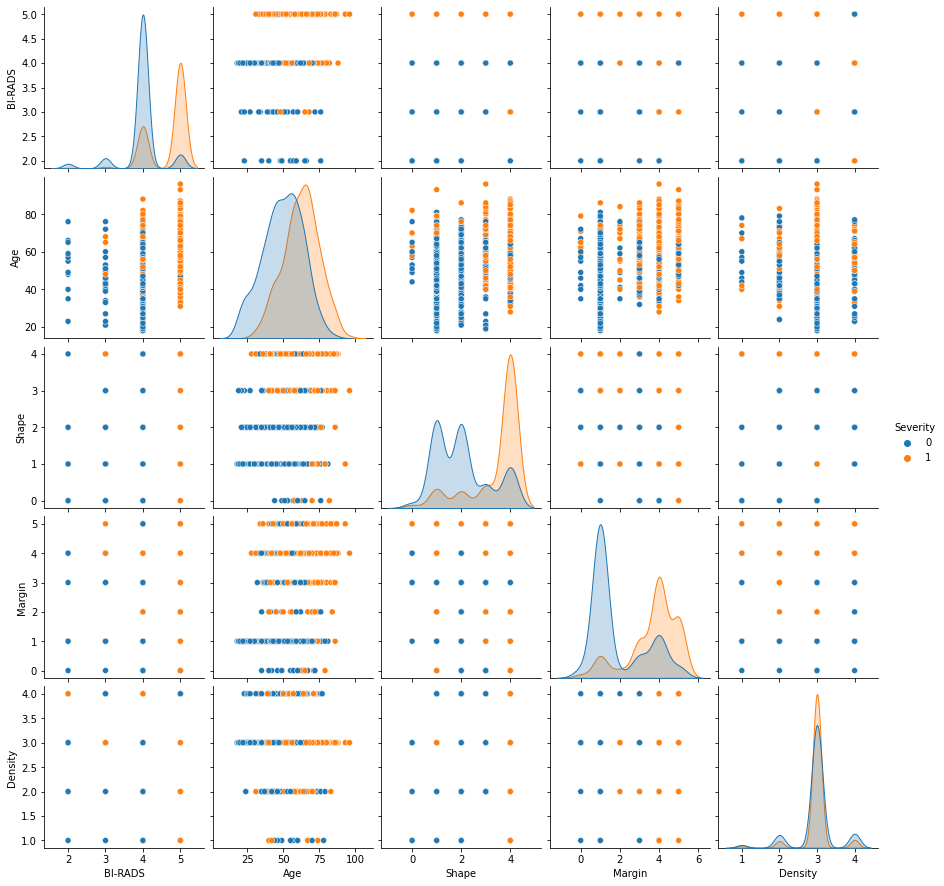

In [47]:
sn.pairplot(df_original, hue="Severity")

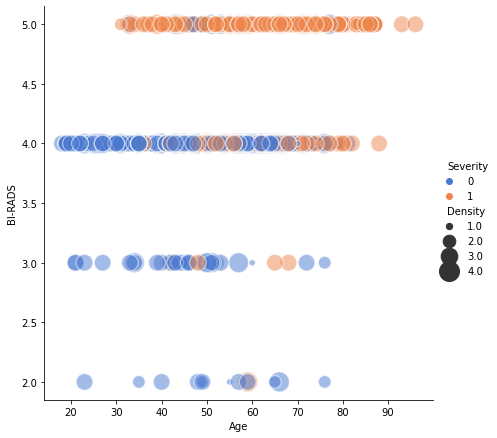

In [48]:
# Plot miles per gallon against horsepower with other semantics
sn.relplot(x="Age", y="BI-RADS", hue="Severity", size="Density",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_original)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168B6AC2710>,
      dtype=object)

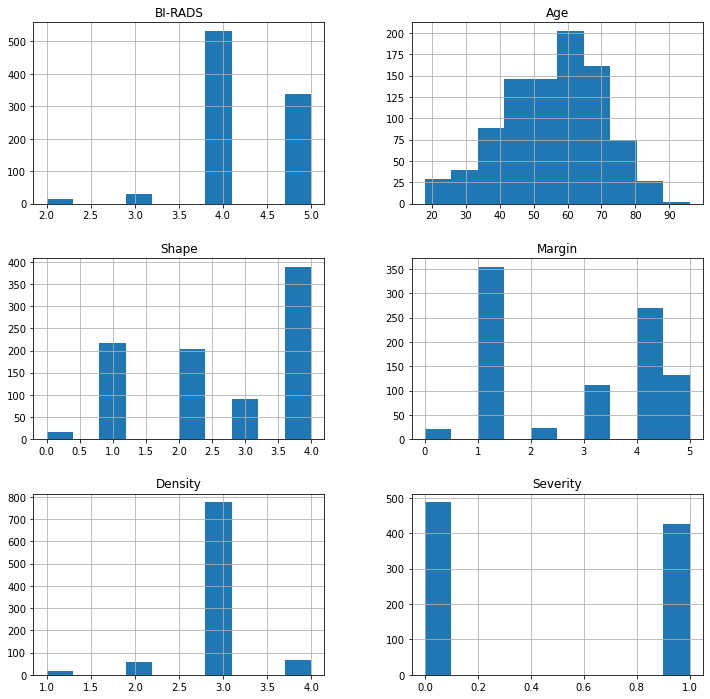

In [49]:
df_original.hist(figsize=(12,12))

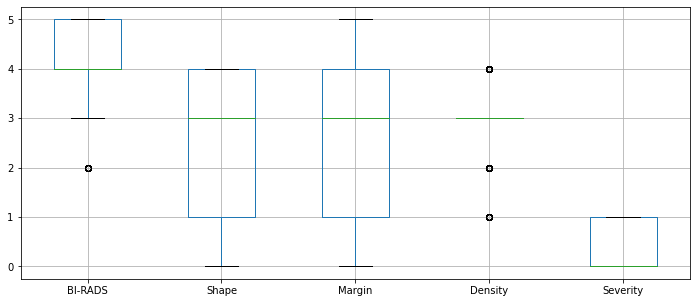

In [50]:
df_original.drop(columns="Age").boxplot(figsize=(12,5))

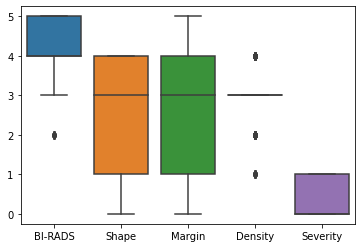

In [51]:
sn.boxplot(data=df_original.drop(columns="Age"))

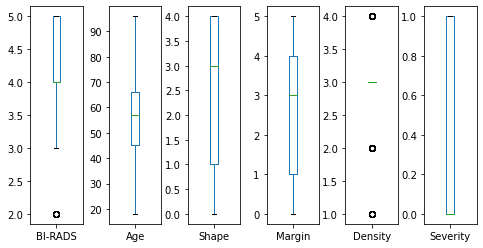

In [52]:
df_original.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(8, 4)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

# Learning Curve Study

Here the goal is to study how to split the dataset into train and test

Steps:
1. select a simple model (we don't need an exstensive model selection here)
2. fit the model to the data multiple time for different train-test splits (80%-20%, 70%-30%, 60%-40%,...)
3. look at the best classification performance reached
4. select the tran-test split that was used in the best classificatin performance

In [53]:
X=df.loc[:,[c for c in df.columns if c != "Severity"]]
Y=df["Severity"]

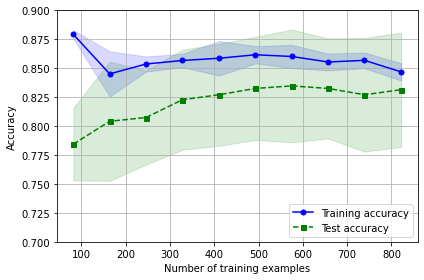

In [54]:
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#feature scaling
scaler = StandardScaler() #demeaning the data and divide them by S.D., the resulting variables have mean=0 and standard deviation=1

#logistic regression
lr = LogisticRegression(random_state=1, solver='lbfgs', max_iter=10000)

#pipeline
pipe_lr = make_pipeline(scaler, lr)


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                           X=X,
                                                           y=Y,
                                                           scoring='accuracy',
                                                           train_sizes=np.linspace(0.1, 1, 10),
                                                           cv=10,
                                                           n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Test accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

In [55]:
best_size=pd.DataFrame(test_scores).mean(axis=1).to_frame().idxmax()
train_size_optimal=np.linspace(0.1, 1, 10)[best_size][0].round(2)
train_size_optimal

0.7

## Train Test Split

In [56]:
X=df.loc[:,[c for c in df.columns if c!="Severity"]]
Y=df["Severity"]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=1-train_size_optimal,
                                                    random_state=1, #the seed of the randomizer
                                                    stratify=Y, #does the split in order ot have in both train and test dataset the same frequency of the responde variable (to avoid bias: overfititng or underfitting)
                                                    shuffle=True)

In [58]:
Y_train.mean()

0.46635367762128327

In [59]:
Y_test.mean()

0.46545454545454545

# Modelling (classification)

### Logistic regression

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [196]:
#defining the pipeline
estimators = [('scaler', StandardScaler()), ('logisticregression', LogisticRegression())]
pipeline_LR = Pipeline(estimators)

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
               'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'logisticregression__penalty': ["l1", "l2"]}

gs = GridSearchCV(estimator=pipeline_LR,
                  param_grid=param_grid,
                  scoring="recall",
                  cv=10,
                  refit=True)
              
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.852183908045977
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


#### Sensitivity analysis

In [197]:
cv_res=pd.DataFrame(gs.cv_results_)
cv_res=cv_res.loc[:,["param_"+c for c in param_grid.keys()]+["mean_test_score"]].dropna().query("mean_test_score>0")
cv_res

,param_logisticregression__C,param_logisticregression__solver,param_logisticregression__penalty,mean_test_score
5,0.001,newton-cg,l2,0.838621
6,0.001,lbfgs,l2,0.838621
7,0.001,liblinear,l2,0.852184
8,0.001,sag,l2,0.838621
9,0.001,saga,l2,0.838621
12,0.01,liblinear,l1,0.721724
14,0.01,saga,l1,0.698161
15,0.01,newton-cg,l2,0.825172
16,0.01,lbfgs,l2,0.825172
17,0.01,liblinear,l2,0.835172


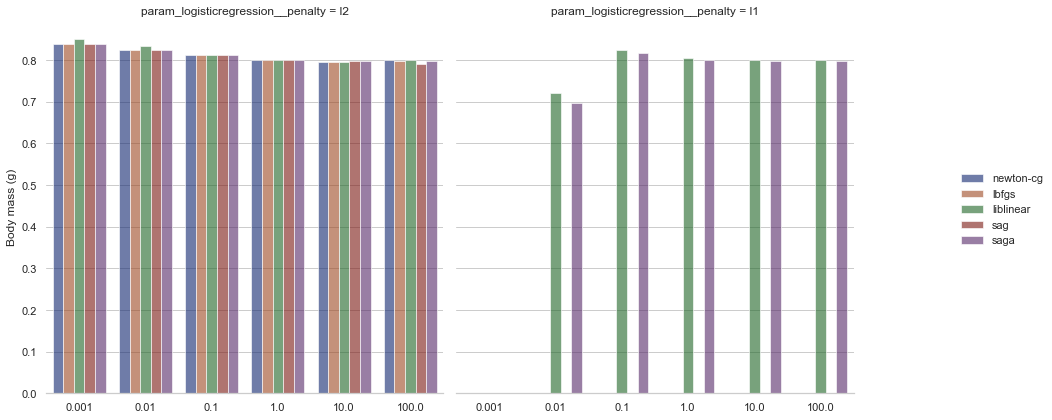

In [201]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cv_res, kind="bar",
    x="param_logisticregression__C", y="mean_test_score", hue="param_logisticregression__solver", palette="dark", col="param_logisticregression__penalty", alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

#### Re-fit the best performing model

In [202]:
Y_test_pred=gs.predict(X_test)

In [203]:
results=pd.concat([Y_test.reset_index(), pd.Series(Y_test_pred)], ignore_index=True, axis=1).rename(columns={0:"ID_patient", 1:"actual", 2:"prediction"})
results=results.set_index("ID_patient")
results

,actual,prediction
ID_patient,,
349,1,1
403,0,1
278,1,1
838,0,0
667,0,0
467,1,1
461,1,0
101,0,0
209,0,0


#### Model Diagnostic

In [204]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("recall (sensitivity) score: {:.4f}".format(recall_score(Y_test, Y_test_pred)))
balanced_accuracy = (precision_score(Y_test, Y_test_pred) + recall_score(Y_test, Y_test_pred)) / 2
print("accuracy score: {:.4f}".format(precision_score(Y_test, Y_test_pred)))
print("balanced score: {:.4f}".format(balanced_accuracy))
print("precision score: {:.4f}".format(precision_score(Y_test, Y_test_pred)))
print("f1 score: {:.4f}".format(f1_score(Y_test, Y_test_pred)))

recall (sensitivity) score: 0.8672
accuracy score: 0.7708
balanced score: 0.8190
precision score: 0.7708
f1 score: 0.8162


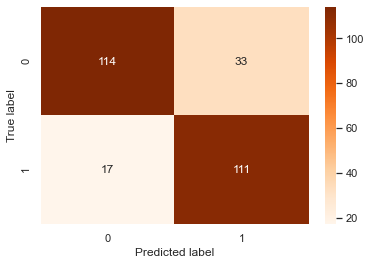

In [205]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_pred)

ax = sn.heatmap(cm, cmap='Oranges', annot=True, fmt='g')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [206]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc

#to calculate the roc we need the scores which is the predicted probability of being malignant
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred, pos_label=1)
AUC=auc(fpr, tpr)
print("AUC of the model is: {:.4f}".format(AUC))

AUC of the model is: 0.8213


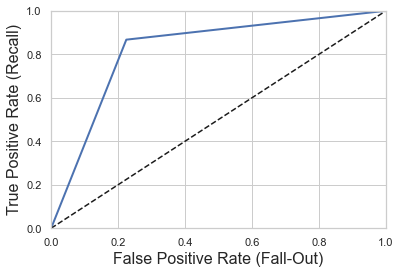

In [207]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)                                           

plt.figure(figsize=(6, 4))                        
plot_roc_curve(fpr, tpr)
plt.show()

### Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [209]:
#defining the pipeline
estimators = [('scaler', StandardScaler()), ('clf', RandomForestClassifier())]
pipeline_RF = Pipeline(estimators)

param_grid = {"clf__max_depth": [3, None],
              "clf__max_features": [1, 3, 10],
              "clf__min_samples_split": [1, 3, 10],
              "clf__min_samples_leaf": [1, 3, 10],
              "clf__criterion": ["gini", "entropy"],
              "clf__n_estimators": [20, 100]}

# run grid search
gs = GridSearchCV(estimator=pipeline_RF,
                  param_grid=param_grid,
                  scoring="recall",
                  cv=10,
                  refit=True)                
             
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8388505747126438
{'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__max_features': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3, 'clf__n_estimators': 100}


#### Sensitivity analysis

In [210]:
cv_res=pd.DataFrame(gs.cv_results_)
cv_res=cv_res.loc[:,["param_"+c for c in param_grid.keys()]+["mean_test_score"]].dropna().query("mean_test_score>0")
cv_res

,param_clf__max_depth,param_clf__max_features,param_clf__min_samples_split,param_clf__min_samples_leaf,param_clf__criterion,param_clf__n_estimators,mean_test_score
2,3,1,3,1,gini,20,0.815402
3,3,1,3,1,gini,100,0.838851
4,3,1,10,1,gini,20,0.798506
5,3,1,10,1,gini,100,0.814943
8,3,1,3,3,gini,20,0.805172
9,3,1,3,3,gini,100,0.818391
10,3,1,10,3,gini,20,0.825057
11,3,1,10,3,gini,100,0.815172
14,3,1,3,10,gini,20,0.815517
15,3,1,3,10,gini,100,0.825402


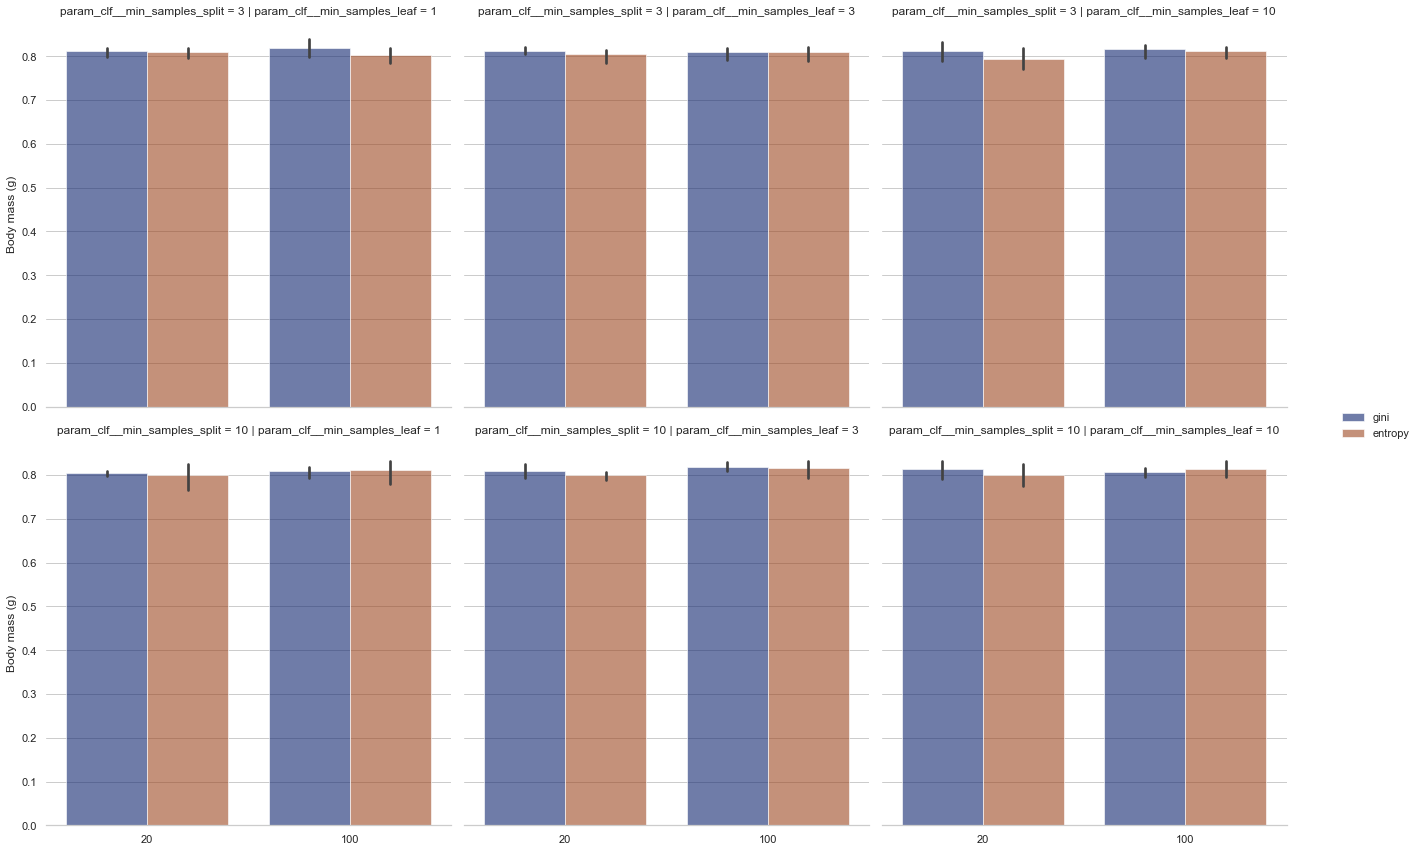

In [220]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cv_res, kind="bar",
    x="param_clf__n_estimators",
    y="mean_test_score",
    hue="param_clf__criterion",
    col="param_clf__min_samples_leaf",
    row="param_clf__min_samples_split",
    palette="dark",
    alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

#### Re-fit the best performing model

In [221]:
Y_test_pred=gs.predict(X_test)

In [222]:
results=pd.concat([Y_test.reset_index(), pd.Series(Y_test_pred)], ignore_index=True, axis=1).rename(columns={0:"ID_patient", 1:"actual", 2:"prediction"})
results=results.set_index("ID_patient")
results

,actual,prediction
ID_patient,,
349,1,1
403,0,1
278,1,1
838,0,0
667,0,0
467,1,1
461,1,0
101,0,0
209,0,0


#### Model Diagnostic

In [223]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("recall (sensitivity) score: {:.4f}".format(recall_score(Y_test, Y_test_pred)))
balanced_accuracy = (precision_score(Y_test, Y_test_pred) + recall_score(Y_test, Y_test_pred)) / 2
print("accuracy score: {:.4f}".format(precision_score(Y_test, Y_test_pred)))
print("balanced score: {:.4f}".format(balanced_accuracy))
print("precision score: {:.4f}".format(precision_score(Y_test, Y_test_pred)))
print("f1 score: {:.4f}".format(f1_score(Y_test, Y_test_pred)))

recall (sensitivity) score: 0.8516
accuracy score: 0.7786
balanced score: 0.8151
precision score: 0.7786
f1 score: 0.8134


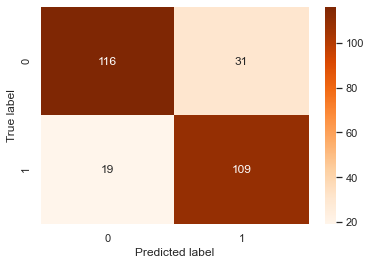

In [224]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_pred)

ax = sn.heatmap(cm, cmap='Oranges', annot=True, fmt='g')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [225]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc

#to calculate the roc we need the scores which is the predicted probability of being malignant
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred, pos_label=1)
AUC=auc(fpr, tpr)
print("AUC of the model is: {:.4f}".format(AUC))

AUC of the model is: 0.8203


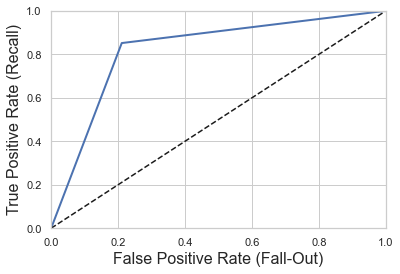

In [226]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)                                           

plt.figure(figsize=(6, 4))                        
plot_roc_curve(fpr, tpr)
plt.show()

### Decision Tree

In [227]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [228]:
#defining the pipeline
estimators = [('scaler', StandardScaler()), ('clf', tree.DecisionTreeClassifier())]
pipeline_DT = Pipeline(estimators)

param_grid = {"clf__max_depth": [3, None],
              "clf__max_features": [1, 3, 10],
              "clf__min_samples_split": [1, 3, 10],
              "clf__min_samples_leaf": [1, 3, 10],
              "clf__criterion": ["gini", "entropy"],
              "clf__splitter": ["best","random"]}

# run grid search
gs = GridSearchCV(estimator=pipeline_DT,
                  param_grid=param_grid,
                  scoring="recall",
                  cv=10,
                  refit=True)                
             
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8426436781609196
{'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__max_features': 1, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 3, 'clf__splitter': 'random'}


#### Sensitivity analysis

In [230]:
cv_res=pd.DataFrame(gs.cv_results_)
cv_res=cv_res.loc[:,["param_"+c for c in param_grid.keys()]+["mean_test_score"]].dropna().query("mean_test_score>0")
cv_res

,param_clf__max_depth,param_clf__max_features,param_clf__min_samples_split,param_clf__min_samples_leaf,param_clf__criterion,param_clf__splitter,mean_test_score
2,3,1,3,1,gini,best,0.611379
3,3,1,3,1,gini,random,0.735517
4,3,1,10,1,gini,best,0.695632
5,3,1,10,1,gini,random,0.691609
8,3,1,3,3,gini,best,0.624483
9,3,1,3,3,gini,random,0.842644
10,3,1,10,3,gini,best,0.664598
11,3,1,10,3,gini,random,0.342989
14,3,1,3,10,gini,best,0.782069
15,3,1,3,10,gini,random,0.325977


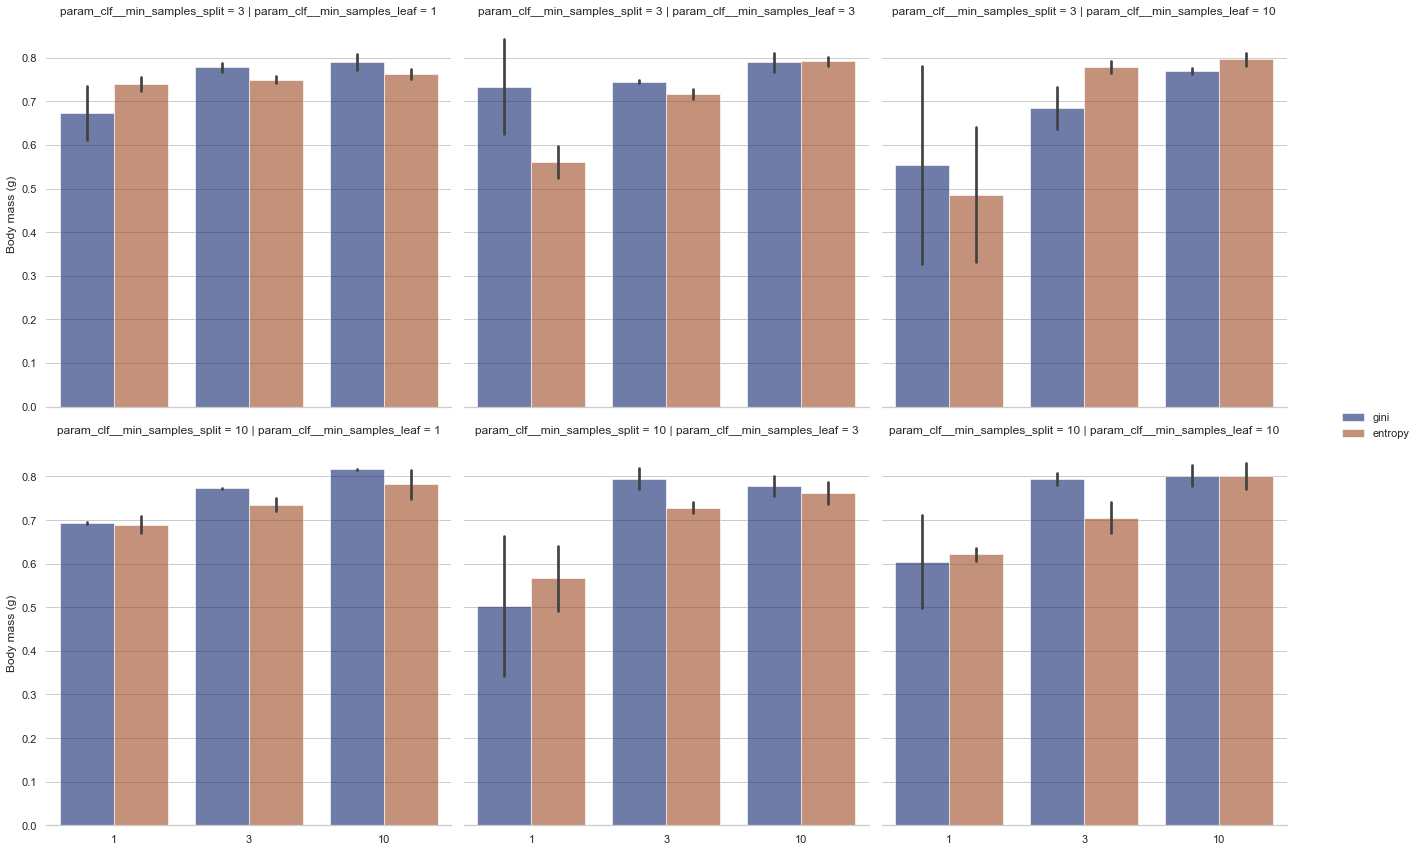

In [231]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cv_res, kind="bar",
    x="param_clf__max_features",
    y="mean_test_score",
    hue="param_clf__criterion",
    col="param_clf__min_samples_leaf",
    row="param_clf__min_samples_split",
    palette="dark",
    alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

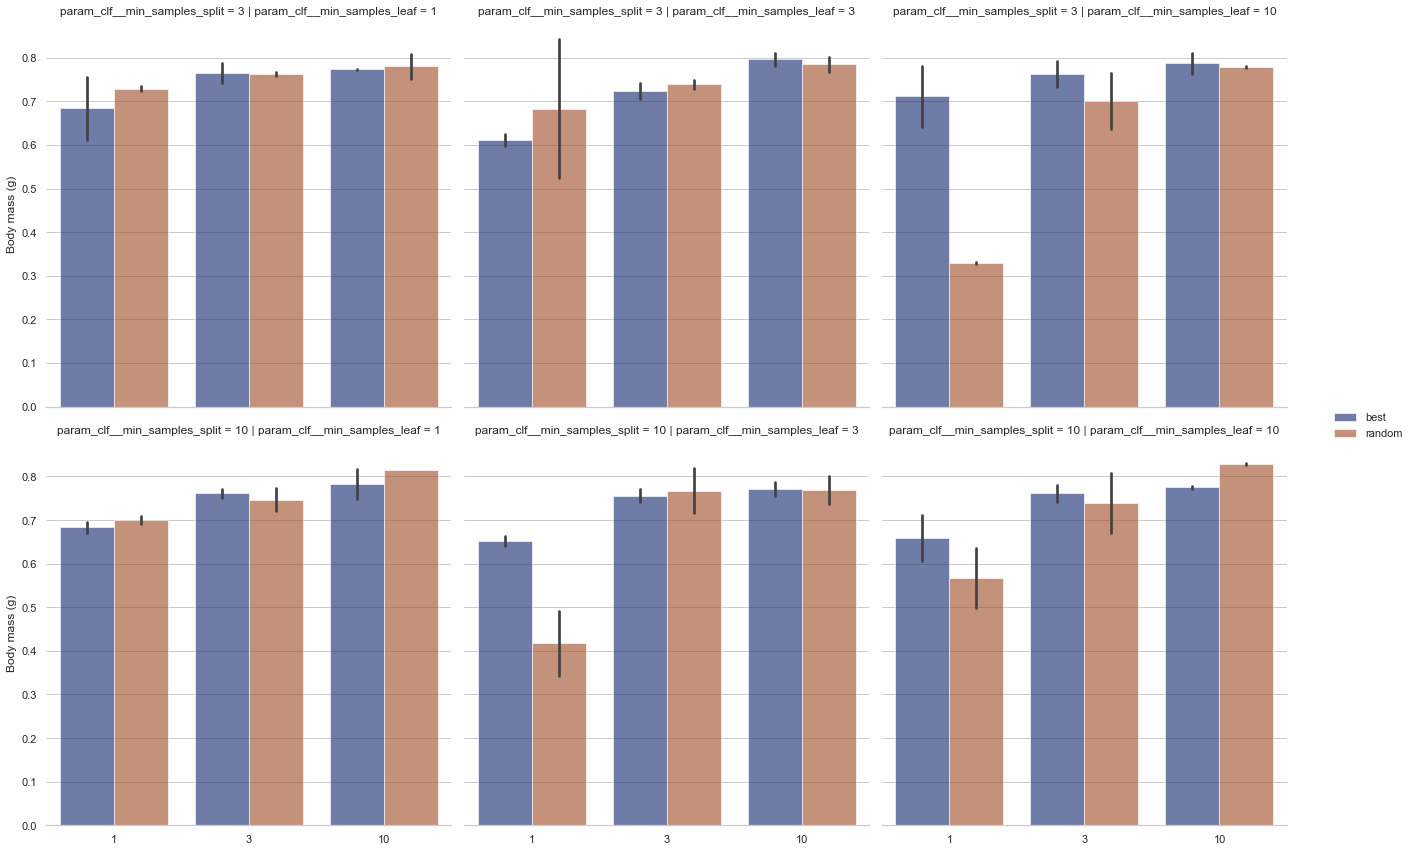

In [232]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cv_res, kind="bar",
    x="param_clf__max_features",
    y="mean_test_score",
    hue="param_clf__splitter",
    col="param_clf__min_samples_leaf",
    row="param_clf__min_samples_split",
    palette="dark",
    alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

#### Re-fit the best performing model

In [233]:
Y_test_pred=gs.predict(X_test)

In [234]:
results=pd.concat([Y_test.reset_index(), pd.Series(Y_test_pred)], ignore_index=True, axis=1).rename(columns={0:"ID_patient", 1:"actual", 2:"prediction"})
results=results.set_index("ID_patient")
results

,actual,prediction
ID_patient,,
349,1,0
403,0,1
278,1,0
838,0,0
667,0,0
467,1,1
461,1,0
101,0,0
209,0,0


#### Model Diagnostic

In [235]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("recall (sensitivity) score: {:.4f}".format(recall_score(Y_test, Y_test_pred)))
balanced_accuracy = (precision_score(Y_test, Y_test_pred) + recall_score(Y_test, Y_test_pred)) / 2
print("accuracy score: {:.4f}".format(precision_score(Y_test, Y_test_pred)))
print("balanced score: {:.4f}".format(balanced_accuracy))
print("precision score: {:.4f}".format(precision_score(Y_test, Y_test_pred)))
print("f1 score: {:.4f}".format(f1_score(Y_test, Y_test_pred)))

recall (sensitivity) score: 0.6250
accuracy score: 0.6838
balanced score: 0.6544
precision score: 0.6838
f1 score: 0.6531


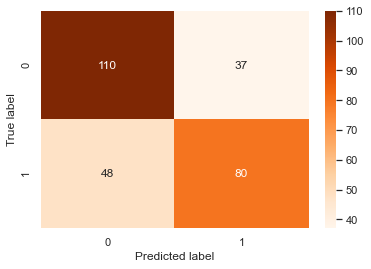

In [236]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_pred)

ax = sn.heatmap(cm, cmap='Oranges', annot=True, fmt='g')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [237]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc

#to calculate the roc we need the scores which is the predicted probability of being malignant
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred, pos_label=1)
AUC=auc(fpr, tpr)
print("AUC of the model is: {:.4f}".format(AUC))

AUC of the model is: 0.6866


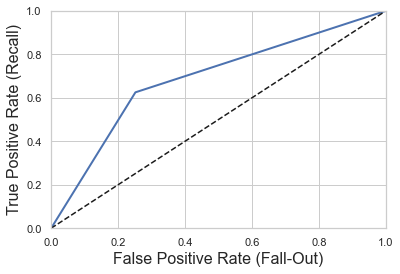

In [238]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)                                           

plt.figure(figsize=(6, 4))                        
plot_roc_curve(fpr, tpr)
plt.show()